In [5]:
import pandas as pd 

data = pd.read_csv("/Applications/MAMP/htdocs/local/kodingakademi/Python/python 3/machine learning/ML/Unsupervised learning/country_data.csv")
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


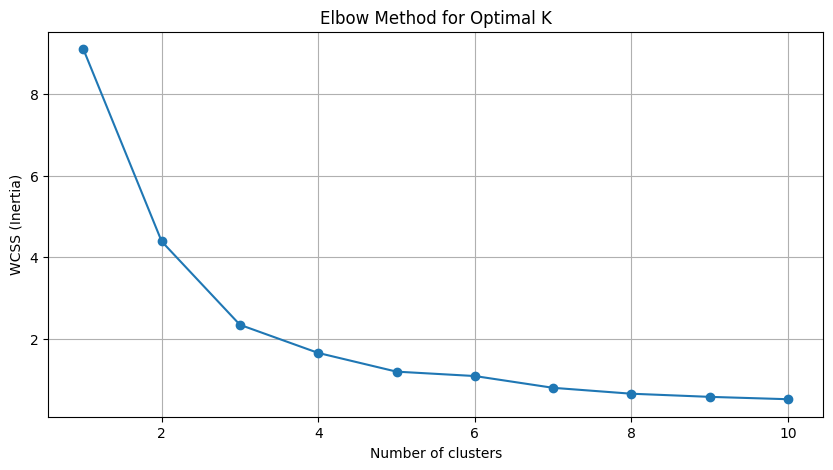

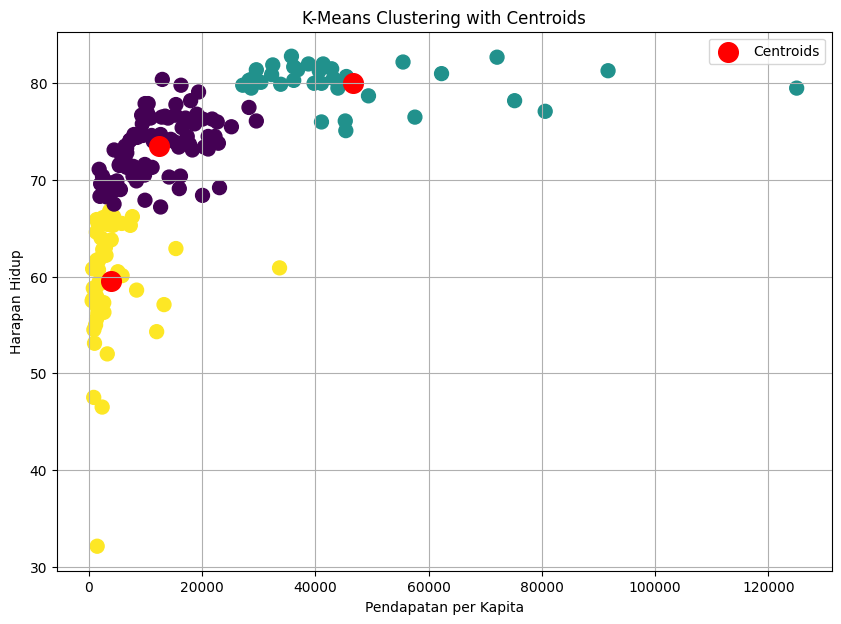

Silhouette Score: 0.52


In [6]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Langkah 2: Memilih Fitur yang Diperlukan
df_selected = data[['income', 'life_expec']]  # Menggunakan 'income' dan 'life_expec' dari dataset

# Langkah 3: Normalisasi Data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_selected)

# Langkah 4: Menentukan Jumlah Kluster dengan Metode Elbow
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Visualisasi Metode Elbow
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Inertia)')
plt.grid()
plt.show()

# Langkah 5: Melatih Model K-Means
k = 3  # Ganti dengan jumlah kluster yang ditentukan dari metode Elbow
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
data['Cluster'] = kmeans.fit_predict(df_scaled)

# Langkah 6: Menghitung Centroids
centroids = kmeans.cluster_centers_
centroids_original_scale = scaler.inverse_transform(centroids)

# Langkah 7: Visualisasi Hasil Clustering
plt.figure(figsize=(10, 7))
plt.scatter(data['income'], data['life_expec'], c=data['Cluster'], cmap='viridis', s=100)
plt.scatter(centroids_original_scale[:, 0], centroids_original_scale[:, 1], s=200, c='red', label='Centroids')
plt.xlabel('Pendapatan per Kapita')
plt.ylabel('Harapan Hidup')
plt.title('K-Means Clustering with Centroids')
plt.legend()
plt.grid()
plt.show()

# Langkah 8: Menghitung Silhouette Score
silhouette_avg = silhouette_score(df_scaled, data['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.2f}")